## Listagem das variaveis

Esse notebook tem como objetivo exclusivo listar quais são as variáveis e seus respectivos tipos de dados. Essa informação será utilizada para incluir os dados no banco. 


In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from missingno import matrix

['CMT' 'VTS' 'DDS' 'TS']
['Cash' 'CASH' 'Credit' 'CREDIT' 'No Charge' 'Dispute']
Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')
['CMT' 'VTS' 'DDS' 'TS']
['Cash' 'CASH' 'Credit' 'CREDIT' 'No Charge' 'Dispute']
Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')
['CMT' 'VTS' 'DDS' 'TS']
['Cash' 'CASH' 'Credit' 'CREDIT' 'No Charge' 'Dispute']
Index(['vendor_id', 'pickup_datetime', 'dropoff_datetim

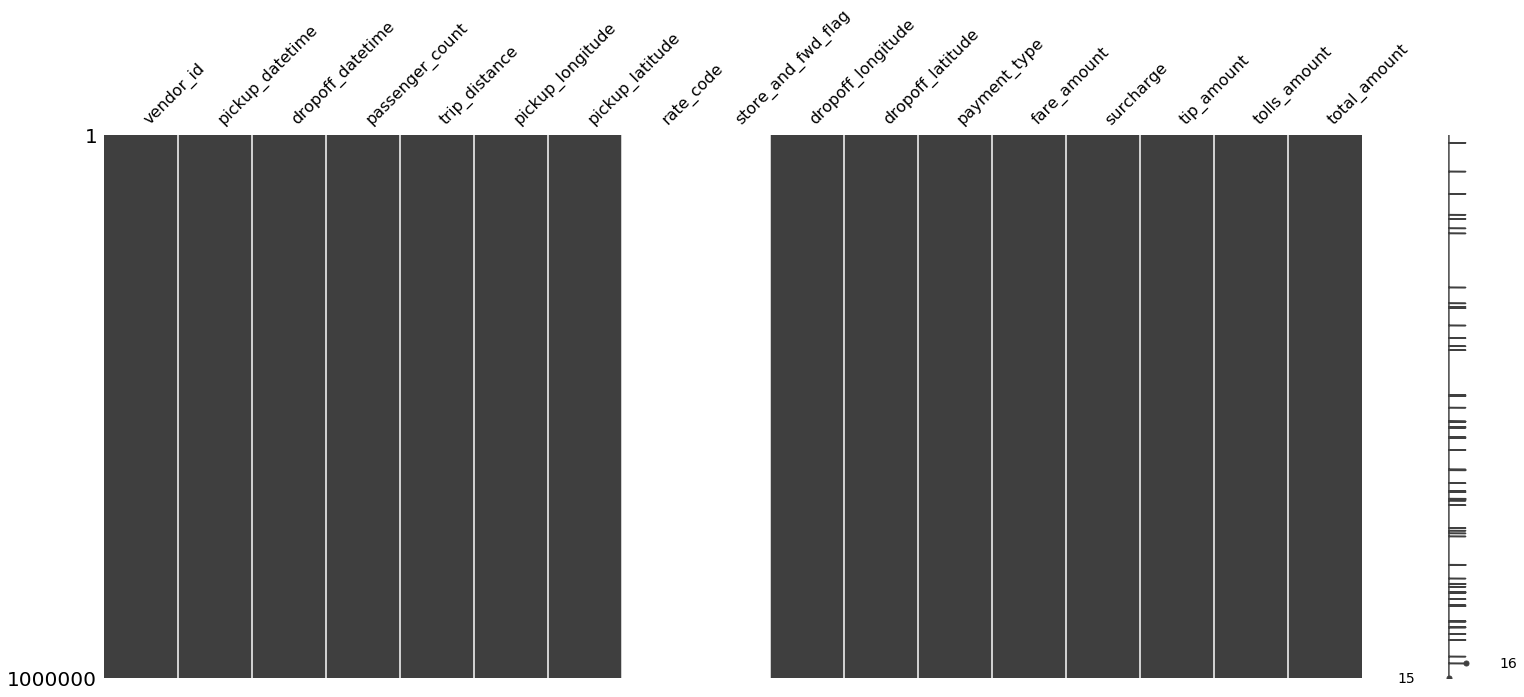

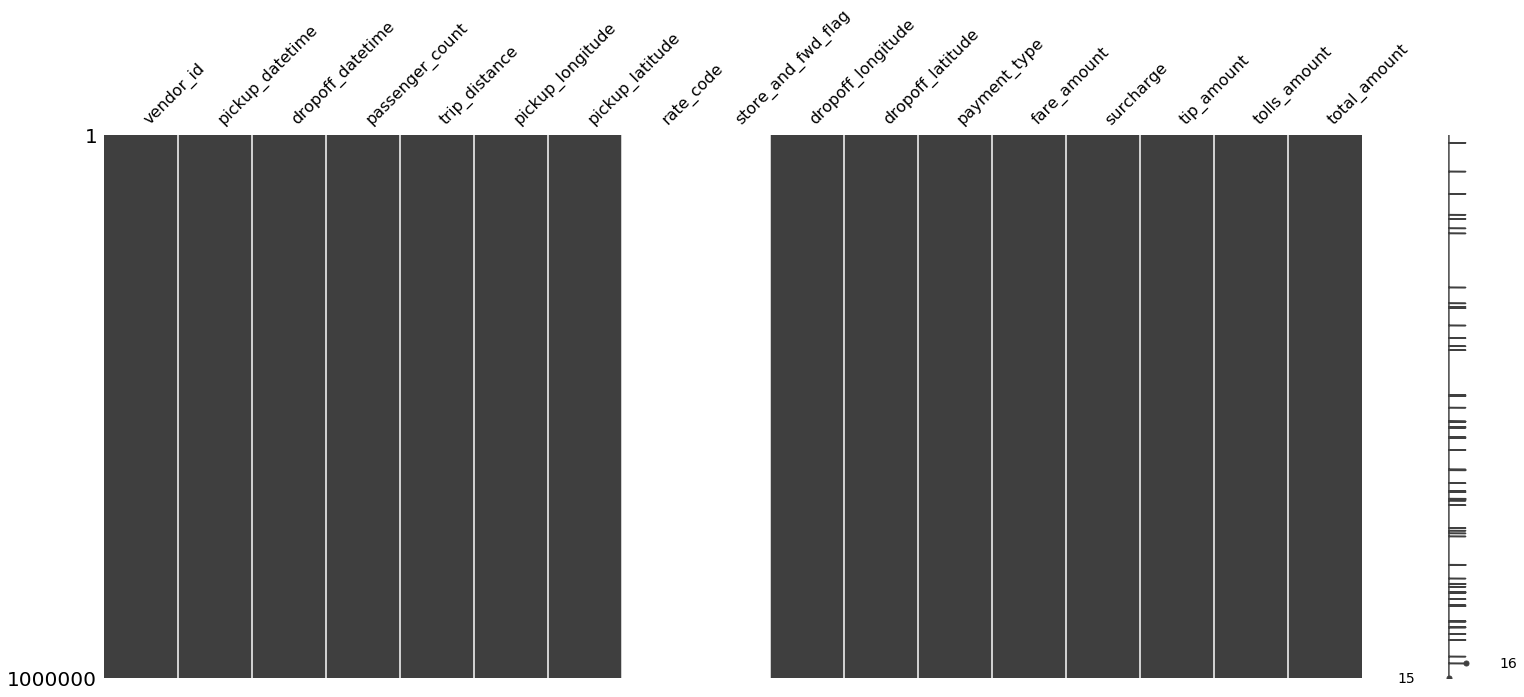

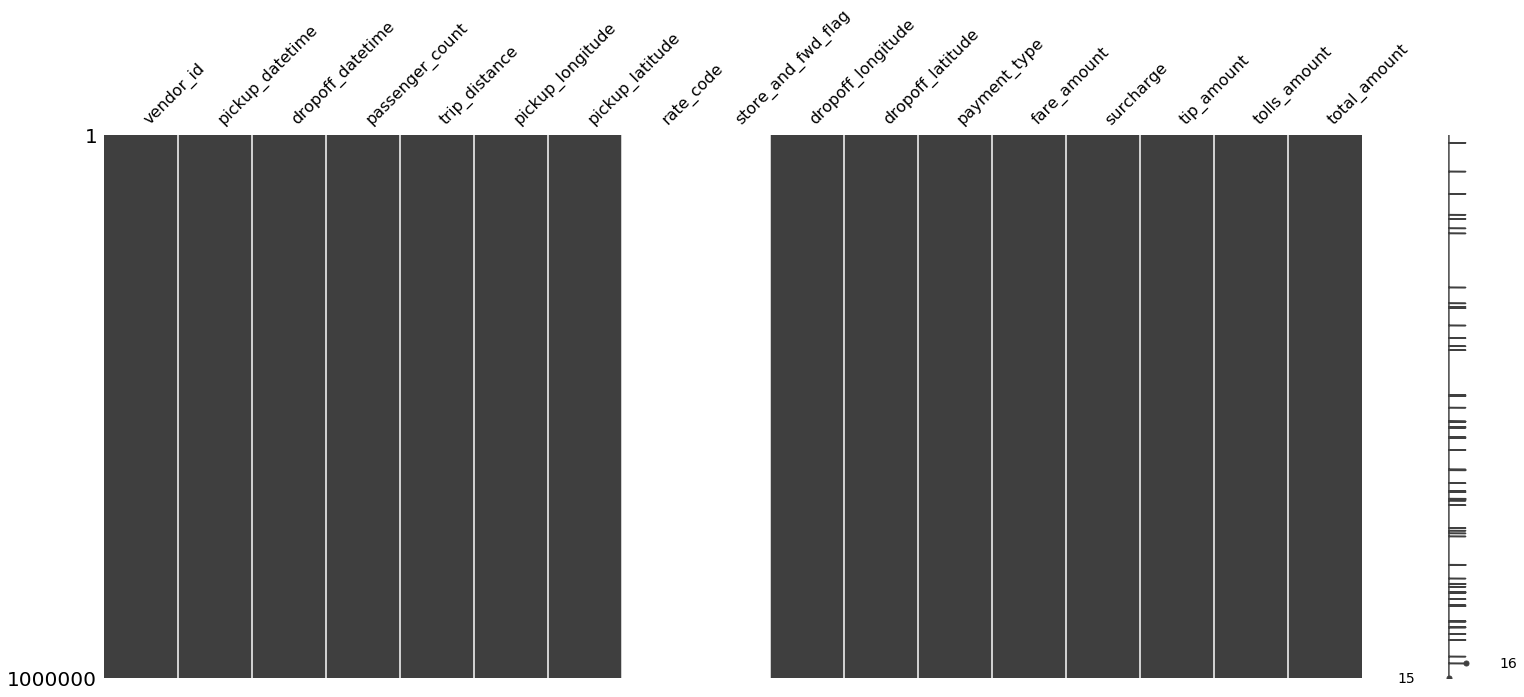

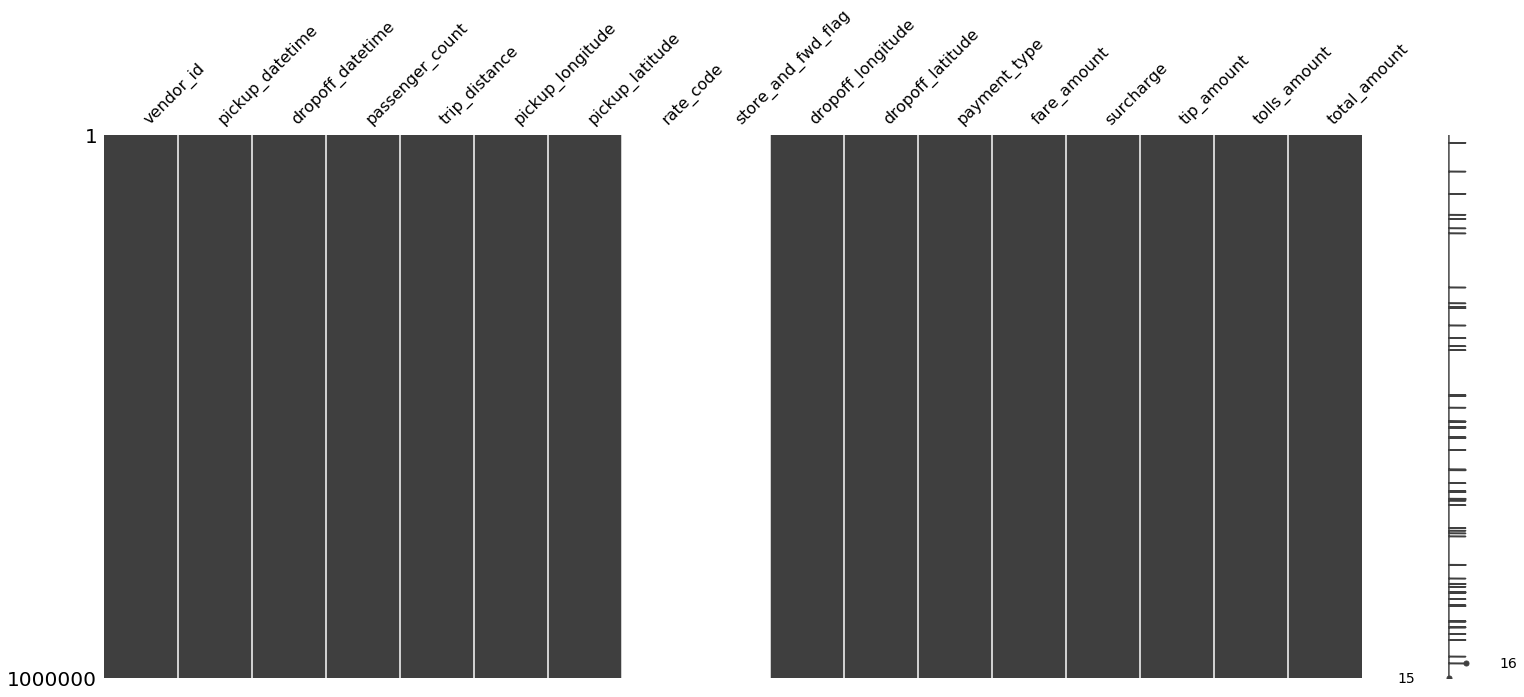

In [10]:
files = [
    '../data/raw/data-sample_data-nyctaxi-trips-2009-json_corrigido.json',
    '../data/raw/data-sample_data-nyctaxi-trips-2010-json_corrigido.json',
    '../data/raw/data-sample_data-nyctaxi-trips-2011-json_corrigido.json',
    '../data/raw/data-sample_data-nyctaxi-trips-2012-json_corrigido.json'
]

trips = pd.DataFrame([])
for file in files:
    buffer = open(file, 'r')
    trips = pd.DataFrame([
                json.loads(text.split('\n')[0])
                for text in buffer.readlines()
            ])
    print(trips.vendor_id.unique())
    print(trips.payment_type.unique())
    print(trips.columns)
    matrix(trips)
    del trips


2009-01-04 00:00:16.442478+00:00 2009-12-09 23:59:45.062242+00:00
2010-01-04 00:00:07.870567+00:00 2010-12-11 23:59:45.497242+00:00
2011-01-10 00:00:37.954330+00:00 2011-11-25 23:59:29.036579+00:00
2012-01-02 00:02:07.518922+00:00 2012-10-27 23:59:05.262820+00:00


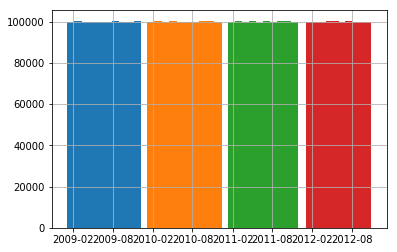

In [9]:
_, a = plt.subplots(1, 1)
trips = pd.DataFrame([])
for file in files:
    buffer = open(file, 'r')
    trips = pd.DataFrame([
                json.loads(text.split('\n')[0])
                for text in buffer.readlines()
            ])
    trips.pickup_datetime = trips.pickup_datetime.map(pd.Timestamp)
    trips.pickup_datetime.hist(ax=a)
    print(trips.pickup_datetime.min(), trips.pickup_datetime.max())
    del trips


### OBS

Como mostrando no histograma acima, o dado apresenta "falhas" no tempo. Faltam dados de parte dos meses de Dezembro e Janeiro. 

In [2]:
files = [
    '../data/raw/data-vendor_lookup-csv.csv',
    '../data/raw/data-payment_lookup-csv.csv'
]

payment = pd.read_csv(files[0])
payment

,vendor_id,name,address,city,state,zip,country,contact,current
0,CMT,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,VTS,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes
2,DDS,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3,TS,Total Solutions Co,Five Boroughs Taxi Co.,Brooklyn,NY,11229,USA,mgmt@5btc.com,Yes
4,MT,Mega Taxi,4 East Jennings St.,Brooklyn,NY,11228,USA,contact@megataxico.com,No


In [3]:
payment

,vendor_id,name,address,city,state,zip,country,contact,current
0,CMT,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,VTS,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes
2,DDS,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3,TS,Total Solutions Co,Five Boroughs Taxi Co.,Brooklyn,NY,11229,USA,mgmt@5btc.com,Yes
4,MT,Mega Taxi,4 East Jennings St.,Brooklyn,NY,11228,USA,contact@megataxico.com,No


In [4]:
payment_lookup = pd.read_csv(files[1], skiprows=1)
payment_lookup

,payment_type,payment_lookup
0,Cas,Cash
1,CAS,Cash
2,Cre,Credit
3,CRE,Credit
4,No,No Charge
...,...,...
3283,3267,Foo
3284,3268,Foo
3285,3269,Foo
3286,3270,Foo


In [9]:
payment_lookup.payment_lookup.unique()

array(['Cash', 'Credit', 'No Charge', 'Dispute', 'Unknown', 'Foo'],
      dtype=object)

In [12]:
payment_lookup.payment_type.unique().size, len(payment_lookup)

(3288, 3288)

In [9]:
pl = payment_lookup.set_index('payment_type')
{
    method: pl.loc[method].payment_lookup
    for method in ['Cash', 'CASH', 'Credit', 'CREDIT', 'No Charge', 'Dispute']
}
    

{'Cash': 'Cash',
 'CASH': 'Cash',
 'Credit': 'Credit',
 'CREDIT': 'Credit',
 'No Charge': 'No Charge',
 'Dispute': 'Dispute'}